# Pymaceuticals Inc.
---

### Analysis

The mean, median, variance and standard deviation tumor volume for Capomulin and Ramicane is much smaller than the other regimens.

The mouse in the Capomulin trial saw it's tumor volume decrease over the study period.

There is a strong positive correlation between weight in grams and average tumor volume in a mouse from the capomulin trial. 


 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge = pd.merge(study_results, mouse_metadata, 
                     how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_check = mouse_study_merge['Mouse ID'].nunique()
mice_check

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_study_merge.count() - No missing data
#concatenate ID and Timepoint
mouse_study_merge["ID_Time"] = mouse_study_merge["Mouse ID"].map(str) + mouse_study_merge["Timepoint"].map(str)

#Number of duplicated is 5
mouse_study_merge["ID_Time"].duplicated().sum()

#list duplicated
mouse_study_merge["ID_Time"].loc[mouse_study_merge["ID_Time"].duplicated()]

137      g9890
360      g9895
681     g98910
869     g98915
1111    g98920
Name: ID_Time, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
id_time_df = mouse_study_merge.drop_duplicates("ID_Time")
id_time_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),ID_Time
0,b128,0,45.000000,0,Capomulin,Female,9,22,b1280
1,f932,0,45.000000,0,Ketapril,Male,15,29,f9320
2,g107,0,45.000000,0,Ketapril,Female,2,29,g1070
3,a457,0,45.000000,0,Ketapril,Female,11,30,a4570
4,c819,0,45.000000,0,Ketapril,Male,21,25,c8190
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,r94445
1889,u364,45,31.023923,3,Capomulin,Male,18,17,u36445
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,p43845
1891,x773,45,58.634971,4,Placebo,Female,21,30,x77345


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_check2 = id_time_df['Mouse ID'].nunique()
mice_check2

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sd = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_study_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Dev":sd, "SEM":sem})
summary


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen
#Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = mouse_study_merge.groupby(['Drug Regimen']).agg(mean =('Tumor Volume (mm3)', np.mean), median = ('Tumor Volume (mm3)', np.median), variance = ('Tumor Volume (mm3)', np.var), SD = ('Tumor Volume (mm3)', np.std), SEM = ('Tumor Volume (mm3)', st.sem))
summary_agg


,mean,median,variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


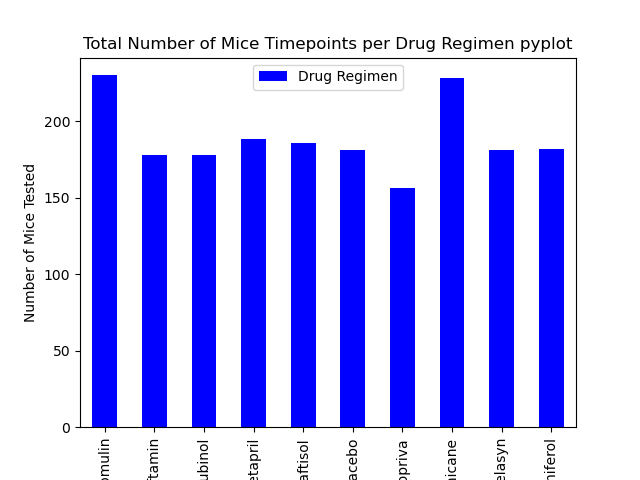

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_reg = id_time_df.groupby('Drug Regimen')
drug_reg_ct = pd.DataFrame(drug_reg['Drug Regimen'].count())

pan_bar = drug_reg_ct.plot(kind='bar', title="Total Number of Timepoints per Drug Regimen Pandas", color="b")

pan_bar.set_xlabel("Drug Regimen")
pan_bar.set_ylabel("Count")
plt.savefig('bar_pandas.png', bbox_inches='tight')
plt.show()

NameError: name 'Print' is not defined

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(drug_reg_ct))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_reg_ct["Drug Regimen"], color ='b' , align='center', width=.5)


#pyplot_bar = id_time_df.plt.bar('drug regimen', 'Mouse ID', color='r', alpha=0.5, align="center" )
plt.title("Total Number of Mice Timepoints per Drug Regimen pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.savefig('bar_pandas.png', bbox_inches='tight')
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

<IPython.core.display.Javascript object>


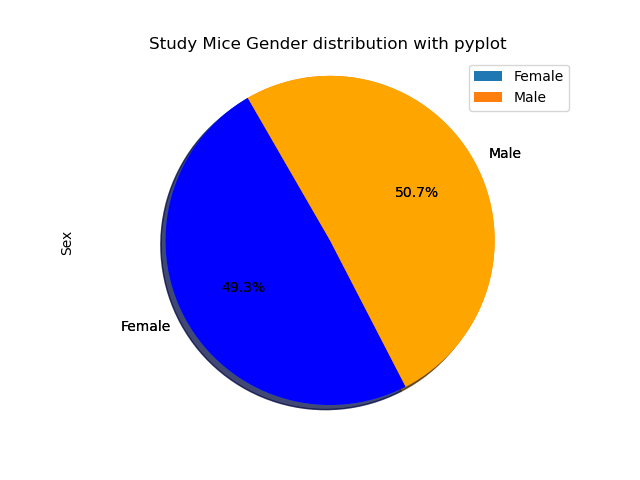

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = id_time_df.groupby('Sex')
gender_ct = pd.DataFrame(gender['Sex'].count())
# gender_ct.head()  930 female, 958 male

gender_ct.plot(kind='pie',y='Sex', title= '"Study Mice Gender distribution with pandas', startangle=120, 
               shadow = True, autopct="%1.1f%%")
plt.axis('equal')
plt.savefig('pie_pandas.png', bbox_inches='tight')
plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = list(gender_ct.index.values)

gender_ct_values = gender_ct["Sex"]

colors = ['blue', 'orange']

plt.title("Study Mice Gender distribution with pyplot")
plt.pie(gender_ct_values, labels=gender_label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

plt.axis("equal")
plt.savefig('pie_pyplot.png', bbox_inches='tight')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
top_time_df = pd.DataFrame(id_time_df.groupby('Mouse ID')['Timepoint'].max().sort_values().reset_index().rename(columns={'Timepoint': 'top_timepoint'}))
top_time_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_top_time_df = pd.merge(top_time_df, id_time_df, on='Mouse ID')
merge_top_time_df


,Mouse ID,top_timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),ID_Time
0,t573,0,0,45.000000,0,Ceftamin,Female,15,27,t5730
1,u153,0,0,45.000000,0,Ceftamin,Female,11,25,u1530
2,d133,0,0,45.000000,0,Zoniferol,Male,5,30,d1330
3,n482,0,0,45.000000,0,Propriva,Female,4,29,n4820
4,o848,0,0,45.000000,0,Stelasyn,Female,14,27,o8480
...,...,...,...,...,...,...,...,...,...,...
1883,z969,45,25,63.145652,2,Naftisol,Male,9,30,z96925
1884,z969,45,30,65.841013,3,Naftisol,Male,9,30,z96930
1885,z969,45,35,69.176246,4,Naftisol,Male,9,30,z96935
1886,z969,45,40,70.314904,4,Naftisol,Male,9,30,z96940


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
for drug in four_drugs:
    
    merge_df = merge_top_time_df.loc[merge_top_time_df['Drug Regimen'] == drug]
    #subset final timepoint for each drug for tumor volumes
    last_tumor_df = merge_df.loc[merge_df['Timepoint'] == merge_df['top_timepoint']]
    
    tumors = last_tumor_df['Tumor Volume (mm3)']
    drug_list.append(tumors)
    
    quartiles = tumors.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The median of {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower bound for {drug} is: {lower_bound}.")
    print(f"The upper bound for {drug} is: {upper_bound}.")
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.125164399999996 
The lower bound for Capomulin is: 20.70456164999999.
The upper bound for Capomulin is: 51.83201549.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
The lower bound for Ramicane is: 17.912664470000003.
The upper bound for Ramicane is: 54.30681135.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046 
The lower bound for Infubinol is: 36.83290494999999.
The upper bound for Infubinol is: 82.74144559000001.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interq

<IPython.core.display.Javascript object>


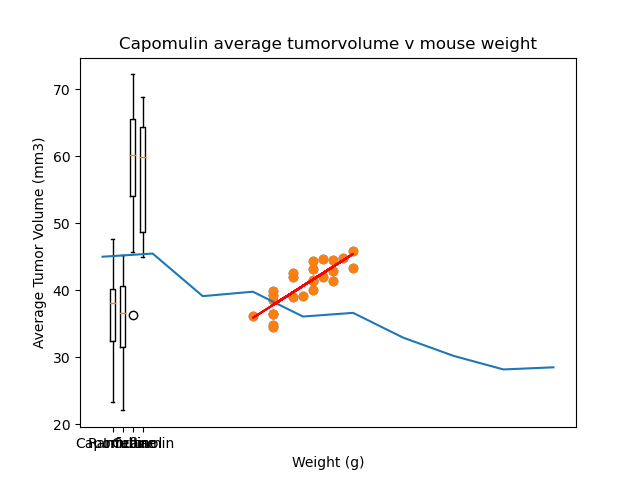

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots()
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(drug_list)
plt.xticks([1,2,3,4],four_drugs)

plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_data = id_time_df.loc[id_time_df['Drug Regimen'] == 'Capomulin']

capo_data.head(20) #find a mouse

capo_mouse = capo_data.loc[capo_data['Mouse ID'] == 'x401']
capo_mouse

plt.plot(capo_mouse['Timepoint'], capo_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of Mouse x401')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('line plot.png', bbox_inches='tight')
plt.show()


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_avg = capo_data.groupby(['Mouse ID']).agg(avg_weight =('Weight (g)', np.mean), avg_tumor_vol = ('Tumor Volume (mm3)', np.mean))
capo_avg.head(20)

plt.scatter(capo_avg['avg_weight'], capo_avg['avg_tumor_vol'])
plt.title('Capomulin average tumorvolume v mouse weight')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatter.png', bbox_inches='tight')
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capo_avg['avg_weight'],capo_avg['avg_tumor_vol'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = capo_avg['avg_weight']
y_values = capo_avg['avg_tumor_vol']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red") #add in regression equation
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('regression.png', bbox_inches='tight')
plt.show()




The correlation between both factors is 0.84
